## Import Libraries

In [40]:
# Import Library
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pickle
import json

## Data Loading

In [41]:
data = pd.read_csv('h8dsft_P1G3_salman_faishal.csv') #load data
data.head(10)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,42.0,1,250,1,15,0,213000.0,1.3,136,0,0,65,1
1,46.0,0,168,1,17,1,271000.0,2.1,124,0,0,100,1
2,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
3,53.0,1,91,0,20,1,418000.0,1.4,139,0,0,43,1
4,50.0,1,582,1,20,1,279000.0,1.0,134,0,0,186,0
5,70.0,1,125,0,25,1,237000.0,1.0,140,0,0,15,1
6,65.0,1,52,0,25,1,276000.0,1.3,137,0,0,16,0
7,70.0,0,161,0,25,0,244000.0,1.2,142,0,0,66,1
8,60.0,1,76,1,25,0,196000.0,2.5,132,0,0,77,1
9,59.0,1,280,1,25,1,302000.0,1.0,141,0,0,78,1


In [42]:
data.tail(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
289,64.0,0,1610,0,60,0,242000.00,1.0,137,1,0,113,0
290,62.0,0,30,1,60,1,244000.00,0.9,139,1,0,117,0
291,53.0,0,196,0,60,0,220000.00,0.7,133,1,1,134,0
292,70.0,1,171,0,60,1,176000.00,1.1,145,1,1,146,0
293,60.0,1,95,0,60,0,337000.00,1.0,138,1,1,146,0
294,63.0,1,122,1,60,0,267000.00,1.2,145,1,0,147,0
295,45.0,0,308,1,60,1,377000.00,1.0,136,1,0,186,0
296,70.0,0,97,0,60,1,220000.00,0.9,138,1,0,186,0
297,53.0,1,446,0,60,1,263358.03,1.0,139,1,0,215,0
298,50.0,0,582,0,62,1,147000.00,0.8,140,1,1,192,0


In [43]:
data.shape

(299, 13)

dataset ini terdiri dari 299 baris dan 13 kolom

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


pada info diatas menampilkan masing masing tipe data dari tiap kolom
- 3 kolom bertipe data float
- 10 kolom bertipe data integer

In [45]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


Dari hasil di atas kita dapat melihat rata-rata, standar deviasi, quartile, nilai minimum, dan nilai maksimum, 

In [46]:
data.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

dataset ini tidak memiliki missing value

In [47]:
data.duplicated().sum()

0

dataset ini tidak memiliki data duplicate

## Exploratory Data Analysis (EDA)

## Death Event

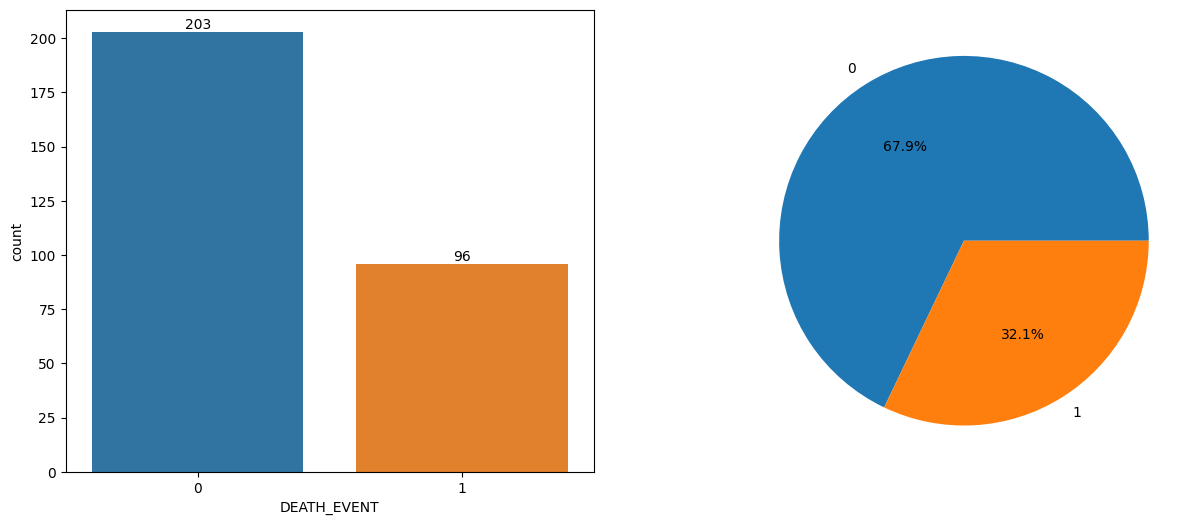

In [48]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
ax = sns.countplot(x='DEATH_EVENT', data=data)
abs_values = data.DEATH_EVENT.value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)

plt.subplot(1,2,2)
plt.pie(data.DEATH_EVENT.value_counts(), labels=data.DEATH_EVENT.value_counts().index ,autopct='%1.1f%%')
plt.show()

pada countplot terlihat ada sekitar 96 orang atau 32.1% orang mengalami kematian akibat gagal jantung

### Age

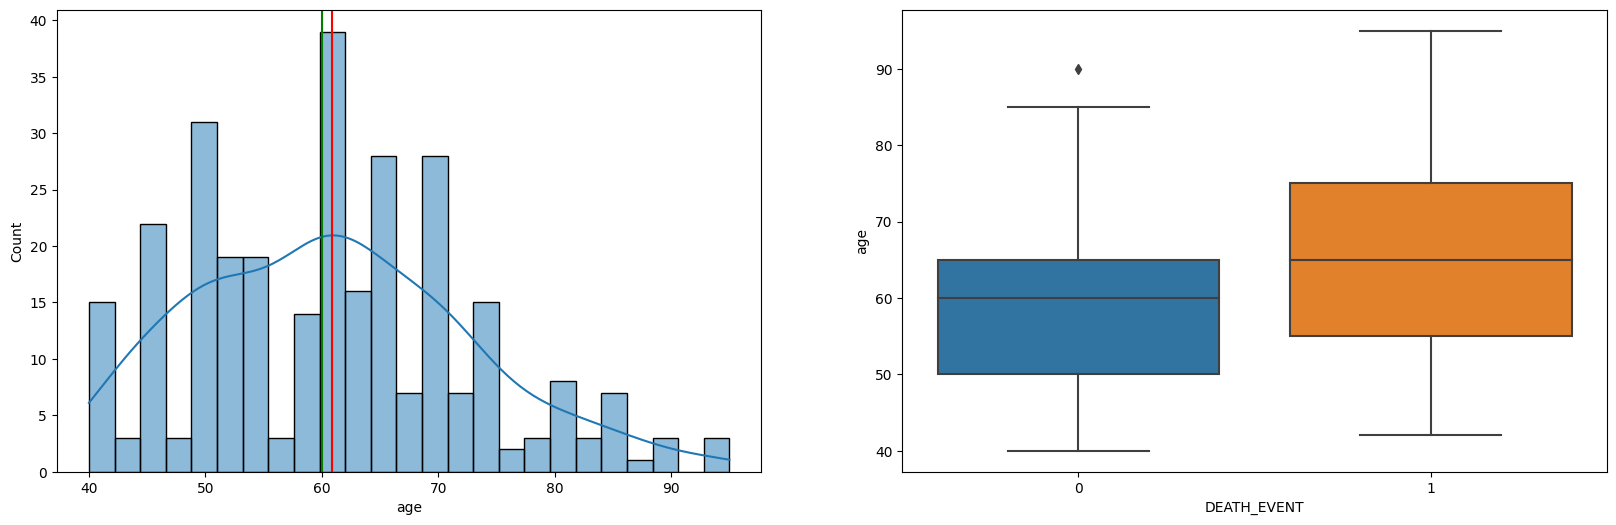

Skewness : 0.4230619067286355
Mean : 60.83389297658862
median : 60.0


In [49]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.histplot(x='age', bins=25, kde = True, data=data)
plt.axvline(data.age.mean(), color = 'r')
plt.axvline(data.age.median(), color = 'g')

plt.subplot(1,2,2)
sns.boxplot(x = 'DEATH_EVENT', y='age', data = data)
plt.show()
print(f'Skewness : {data.age.skew()}')
print(f'Mean : {data.age.mean()}')
print(f'median : {data.age.median()}')

rata rata usia pasien adalah 61 tahun, dan rata rata orang yang mengalami kematian karena gagal jantung sekitar 65 tahun, jika di lihat dari nilai skeweness distribusi kolom age ini normal karna masih dibawah 0.5 dana diatas -0.5.

### Anemia

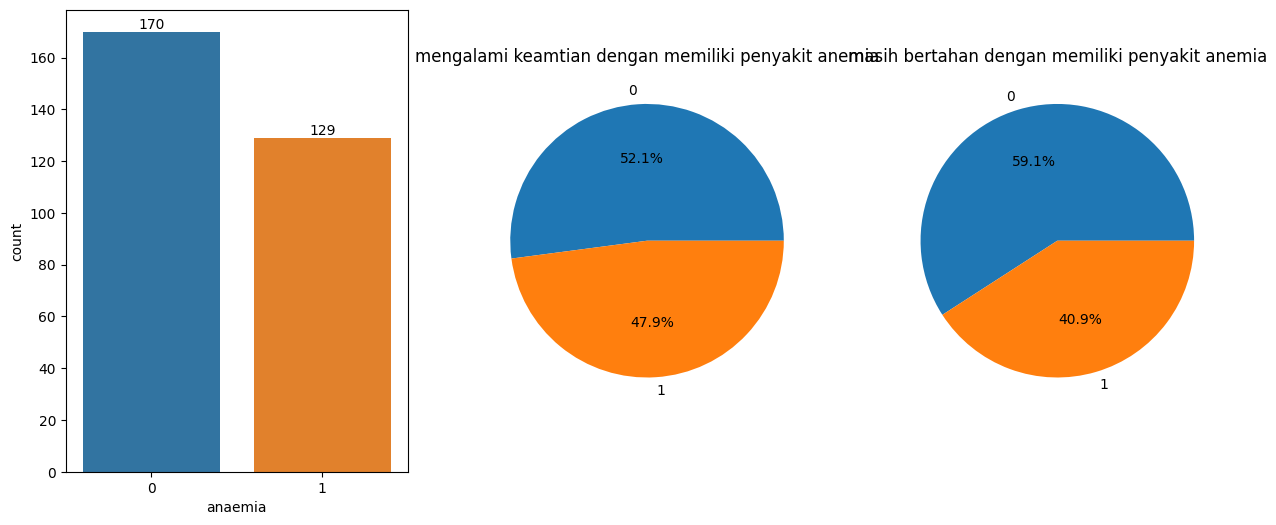

In [50]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
ax = sns.countplot(x='anaemia', data=data)
abs_values = data.anaemia.value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)

plt.subplot(1,3,2)
plt.pie(data[data.DEATH_EVENT == 1].anaemia.value_counts(), labels=data.DEATH_EVENT.value_counts().index ,autopct='%1.1f%%')
plt.title('mengalami keamtian dengan memiliki penyakit anemia')

plt.subplot(1,3,3)
plt.pie(data[data.DEATH_EVENT == 0].anaemia.value_counts(), labels=data.DEATH_EVENT.value_counts().index ,autopct='%1.1f%%')
plt.title('masih bertahan dengan memiliki penyakit anemia')
plt.show()

pada pie chart terlihat bahwa 470.9% orang mengalami kematian akibat gagal jantung dan memiliki penyakit anemia dan yang bertahan hidup sebesar 40.9%

### creatinine_phosphokinase

Skewness : 4.463110084653752
Mean : 581.8394648829432
median : 250.0


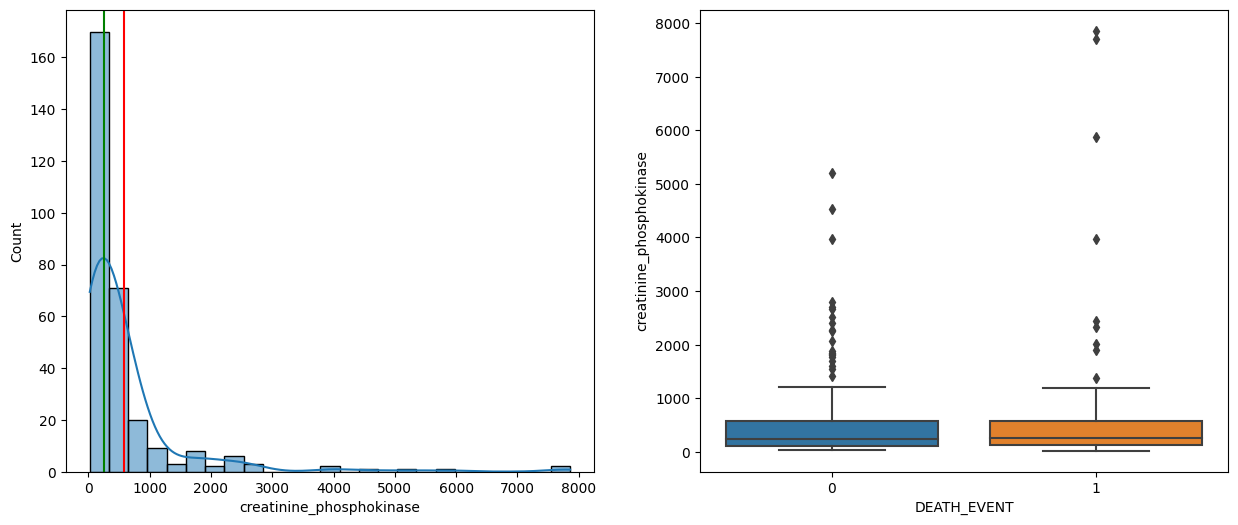

In [51]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(data.creatinine_phosphokinase, bins=25, kde = True)
plt.axvline(data.creatinine_phosphokinase.mean(), color = 'r')
plt.axvline(data.creatinine_phosphokinase.median(), color = 'g')

plt.subplot(1,2,2)
sns.boxplot(x = 'DEATH_EVENT', y='creatinine_phosphokinase', data = data)
print(f'Skewness : {data.creatinine_phosphokinase.skew()}')
print(f'Mean : {data.creatinine_phosphokinase.mean()}')
print(f'median : {data.creatinine_phosphokinase.median()}')

semakin tinggi creatine phosphokinase dalam darah dapat menunjukan kerusakan pada jantung atau otot, dari histogram terlihat bahwa kebanyakan orang mempunya cpk dibawah 500, kadar yang normal pada creatine phosphokinase adalah 39-308 U/L untuk pria dan 26-192 U/L untuk wanita, sehingga bisa dilihat juga bahwa kematian akibat creatine phosphokinase ini sedikit, jika dilihat dari boxplot kolom ini tidak ada hubungannya dengan kolom target, kolom ini memiliki bentuk distribusi yang skewed karena nilai skewness melebihi 0.5


### Diabetes

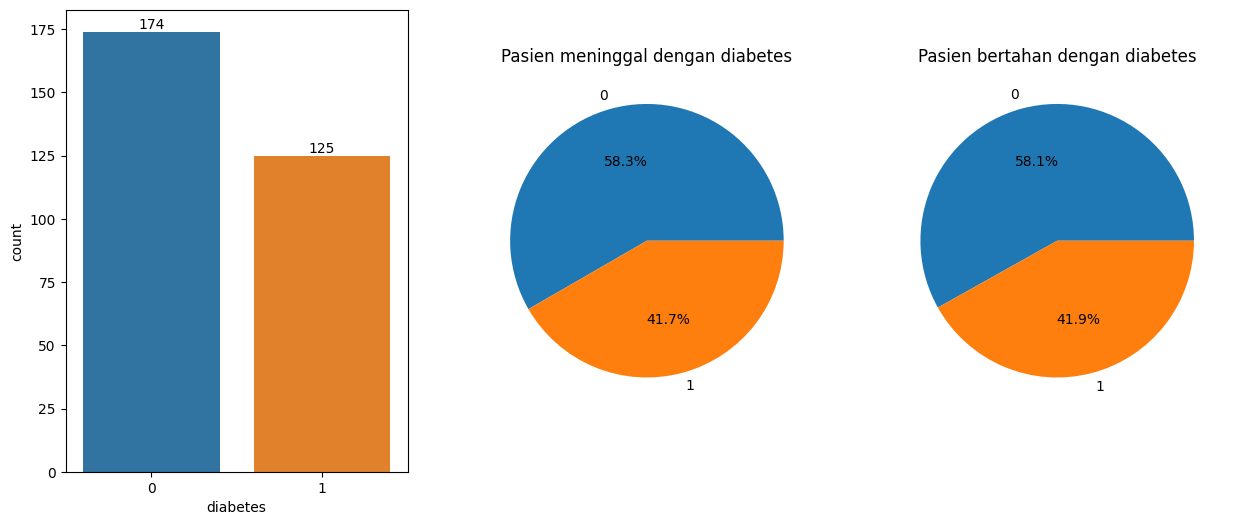

In [52]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
ax = sns.countplot(x='diabetes', data=data)
abs_values = data.diabetes.value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)

plt.subplot(1,3,2)
plt.pie(data[data.DEATH_EVENT == 1].diabetes.value_counts(), labels=data.DEATH_EVENT.value_counts().index ,autopct='%1.1f%%')
plt.title('Pasien meninggal dengan diabetes')

plt.subplot(1,3,3)
plt.pie(data[data.DEATH_EVENT == 0].diabetes.value_counts(), labels=data.DEATH_EVENT.value_counts().index ,autopct='%1.1f%%')
plt.title('Pasien bertahan dengan diabetes')
plt.show()


Sebanyak 41.7% pasien mengalami kematian karena gagal jantung dan memiliki penyakit diabetes, dan 31.9% orang berhasil bertahan hidup dengan memiliki penyakit diabetes.

### ejection_fraction           

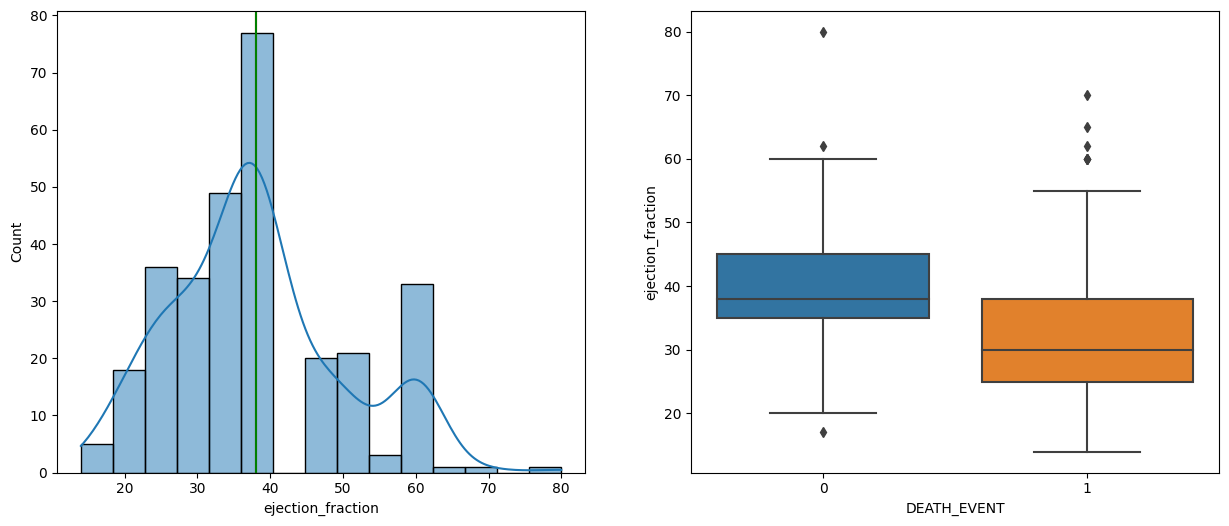

Skewness : 0.5553827516973213
Mean : 38.08361204013378
median : 38.0


In [53]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(x='ejection_fraction', kde=True, data=data)
plt.axvline(data.ejection_fraction.mean(), color = 'r')
plt.axvline(data.ejection_fraction.median(), color = 'g')

plt.subplot(1,2,2)
sns.boxplot(x='DEATH_EVENT', y='ejection_fraction', data = data)
plt.show()
print(f'Skewness : {data.ejection_fraction.skew()}')
print(f'Mean : {data.ejection_fraction.mean()}')
print(f'median : {data.ejection_fraction.median()}')

Ejection fraction adalah persentase dari jumlah darah yang dikeluarkan oleh jantung saat kontraksi. Ejection fraction diukur dengan echocardiography atau MRI, yang menunjukkan jumlah darah yang dikeluarkan oleh jantung saat kontraksi dibandingkan dengan jumlah darah yang ada dalam jantung. Ejection fraction normal adalah antara 55-70%. Nilai yang lebih rendah dari itu menunjukkan masalah dengan fungsi jantung seperti gagal jantung, dan nilai yang lebih tinggi dari itu menunjukkan hipertrofi ventrikel atau hipertrofi ventrikel kiri, kolom ejection fraction ini memiliki distribusi yang sedikit skewed karena nilainya lebih dari 0.5, pada boxplot terlihat bahwa kolom ejection fraction ini memiliki korelasi dengan kolom target, karena ketika seseorang memiliki jumlah darah yang dikeluarkan oleh jantung saat kontraksi diluar 55-70% maka ada masalah dengan fungsi jantungnya.

### high_blood_pressure

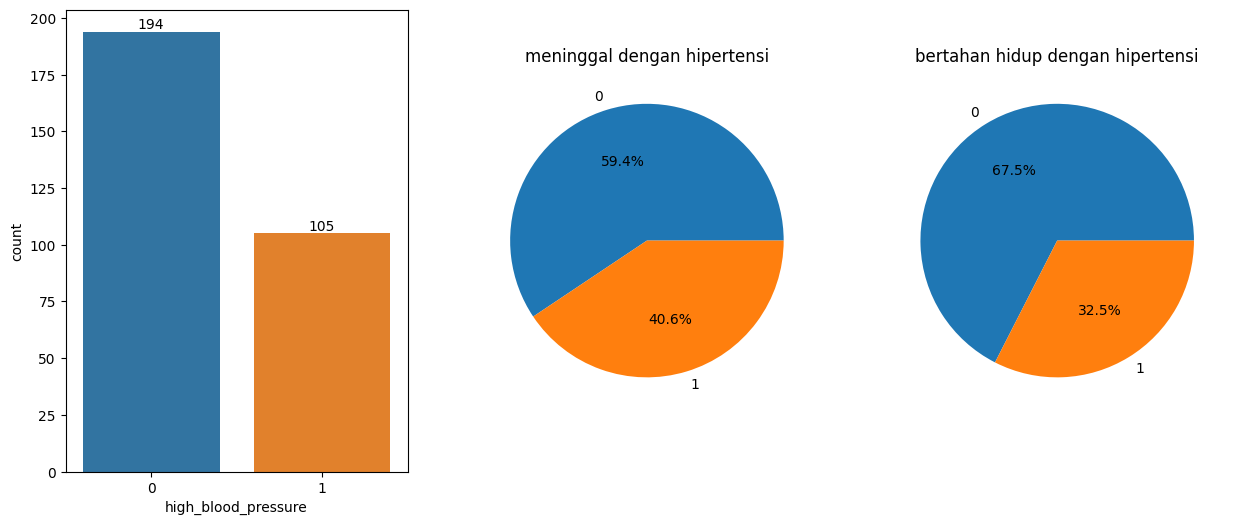

In [54]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
ax = sns.countplot(x='high_blood_pressure', data=data)
abs_values = data.high_blood_pressure.value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)

plt.subplot(1,3,2)
plt.pie(data[data.DEATH_EVENT == 1].high_blood_pressure.value_counts(), labels=data.DEATH_EVENT.value_counts().index ,autopct='%1.1f%%')
plt.title('meninggal dengan hipertensi')

plt.subplot(1,3,3)
plt.pie(data[data.DEATH_EVENT == 0].high_blood_pressure.value_counts(), labels=data.DEATH_EVENT.value_counts().index ,autopct='%1.1f%%')
plt.title('bertahan hidup dengan hipertensi')
plt.show()

pada pie chart terlihat bahwa kematian akibat gagal jantung dan memiliki hipertensi ada sebesar 40.6% dan pasien yang selamat sebesar 32.5%

### platelets

Skewness : 1.462320838275779
Mean : 263358.02926421404
median : 262000.0


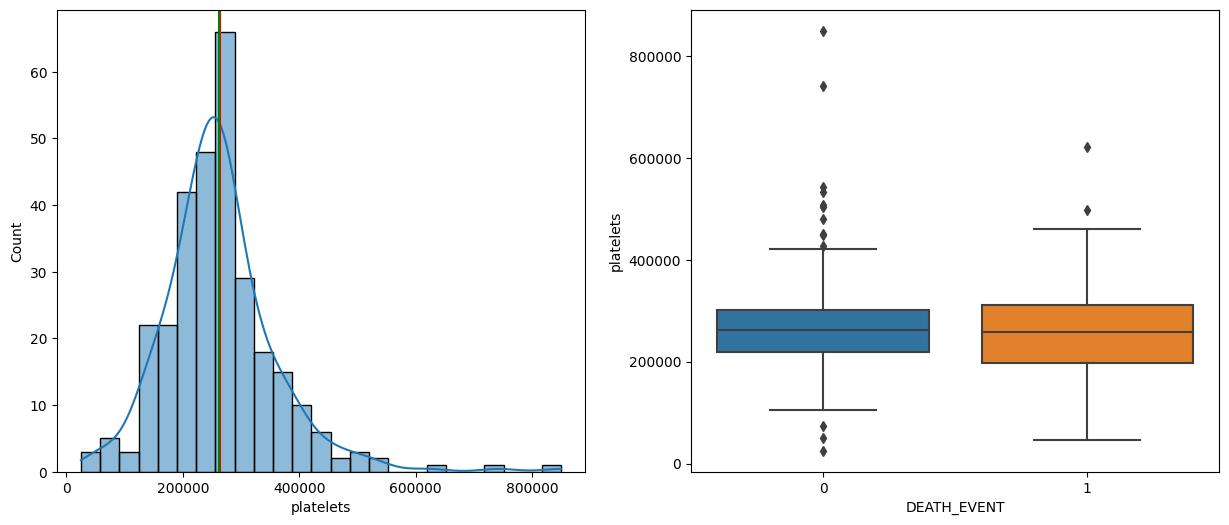

In [55]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(data.platelets, bins=25, kde = True)
plt.axvline(data.platelets.mean(), color = 'r')
plt.axvline(data.platelets.median(), color = 'g')

plt.subplot(1,2,2)
sns.boxplot(x = 'DEATH_EVENT', y='platelets', data = data)
print(f'Skewness : {data.platelets.skew()}')
print(f'Mean : {data.platelets.mean()}')
print(f'median : {data.platelets.median()}')

Platelets (juga dikenal sebagai trombosit) adalah sel darah yang berperan dalam proses pembekuan darah. Platelets membantu menghentikan perdarahan dengan melekat pada tempat kerusakan pembuluh darah dan membentuk trombus (pembekuan darah) untuk menutup luka. Jumlah platelets yang normal dalam darah adalah 150.000-450.000/μL. Jika jumlah platelets rendah, dapat menyebabkan pendarahan yang sulit dihentikan. Jika jumlah platelets tinggi, dapat menyebabkan pembekuan darah yang tidak diinginkan, seperti pembekuan darah dalam pembuluh darah jantung atau otak yang dapat menyebabkan serangan jantung atau stroke. kolom platelets ini memiliki distribusi yang skewed karena nilai skewness yang lebih dari 0.5, dan jika dilihat dari boxplot kolom ini tidak memiliki korelasi dengan kolom target

### serum_creatinine

Skewness : 4.455995882049029
Mean : 1.3938795986622072
median : 1.1


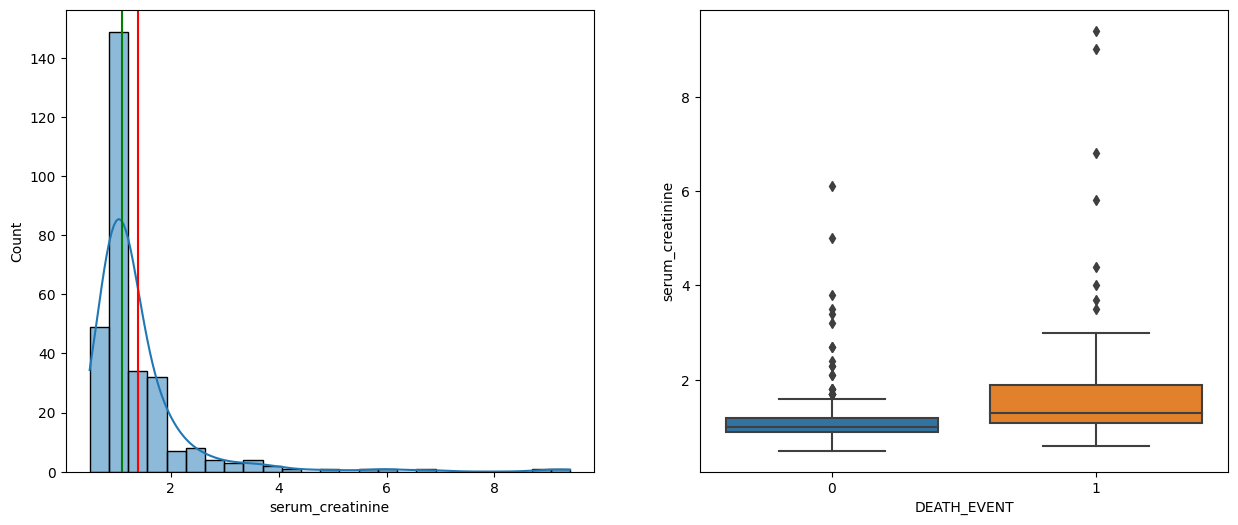

In [56]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(data.serum_creatinine, bins=25, kde = True)
plt.axvline(data.serum_creatinine.mean(), color = 'r')
plt.axvline(data.serum_creatinine.median(), color = 'g')

plt.subplot(1,2,2)
sns.boxplot(x = 'DEATH_EVENT', y='serum_creatinine', data = data)
print(f'Skewness : {data.serum_creatinine.skew()}')
print(f'Mean : {data.serum_creatinine.mean()}')
print(f'median : {data.serum_creatinine.median()}')

Serum creatinine adalah jenis uji darah yang digunakan untuk mengukur kadar creatinine dalam darah. Creatinine adalah produk sampingan dari metabolisme otot yang dihasilkan oleh ginjal. Creatinine dieliminasi dari tubuh melalui urine. Kadar creatinine yang tinggi dalam darah dapat menunjukkan masalah dengan ginjal seperti kerusakan ginjal atau penyakit ginjal. Kadar creatinine yang tinggi juga dapat terjadi karena masalah lain seperti dehidrasi, kekurangan cairan atau karena efek dari obat-obatan tertentu, kolom serum_creatinine memiliki distribusi yang skewed karena nilai skewness yang lebih dari 0.5, memiliki rata rata 1.4, dapat dilihat dari boxplot juga kolom ini memiliki hubungan dengan kolom target.

### serum_sodium 

Skewness : -1.0481360160574988
Mean : 136.62541806020067
median : 137.0


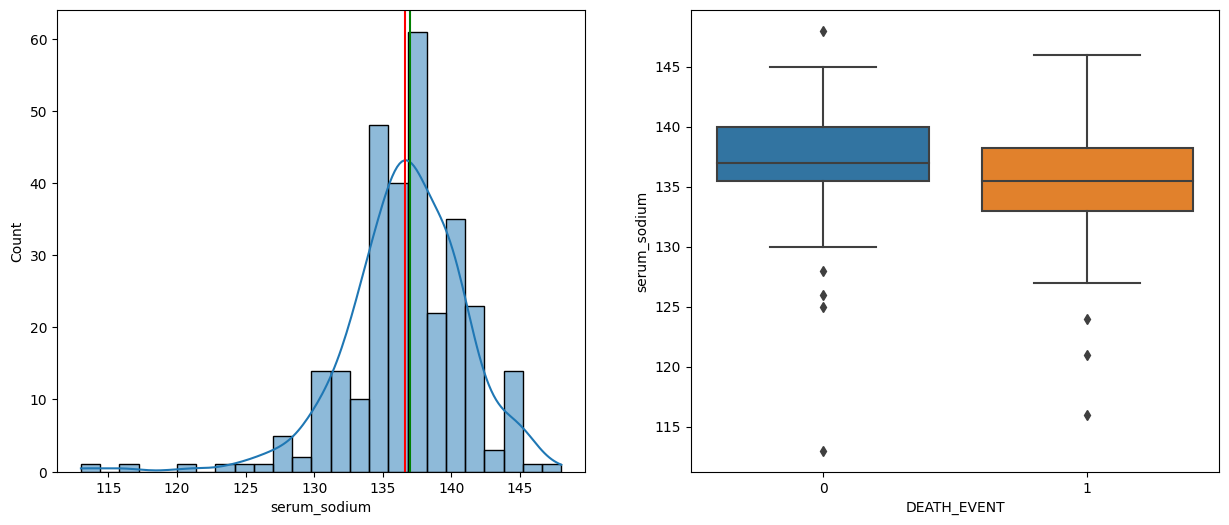

In [57]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(data.serum_sodium, bins=25, kde = True)
plt.axvline(data.serum_sodium.mean(), color = 'r')
plt.axvline(data.serum_sodium.median(), color = 'g')

plt.subplot(1,2,2)
sns.boxplot(x = 'DEATH_EVENT', y='serum_sodium', data = data)
print(f'Skewness : {data.serum_sodium.skew()}')
print(f'Mean : {data.serum_sodium.mean()}')
print(f'median : {data.serum_sodium.median()}')

Serum sodium adalah jenis uji darah yang digunakan untuk mengukur kadar natrium (Na) dalam darah. Natrium adalah elektrolit yang sangat penting bagi tubuh, ia berperan dalam mengatur tekanan cairan dan keseimbangan elektrolit dalam tubuh. Natrium ditemukan dalam cairan tubuh luar sel (ekstraseluler) dan dibutuhkan untuk mempertahankan keseimbangan air dan elektrolit dalam tubuh. Kadar natrium yang normal dalam darah adalah 135-145 mEq/L. Kadar natrium yang rendah (hiponatremia) dapat disebabkan oleh kehilangan cairan yang berlebihan atau penyakit ginjal. Sedangkan kadar natrium yang tinggi (hipernatremia) dapat disebabkan oleh dehidrasi atau kegagalan ginjal, pada histogram kolom serum _sodium memiliki distribusi yang skewed karena nilai skewness lebih kecil dari -0.5, memiliki rata rata 137, dan kebanyakan kadar natrium pada darah pasien sekitar 135-140 yang berarti kebanyakan pasian memiliki kadar natrium yang normal, pada boxplot terlihat juga kolom ini memiliki hubungan dengan kolom target.

### sex

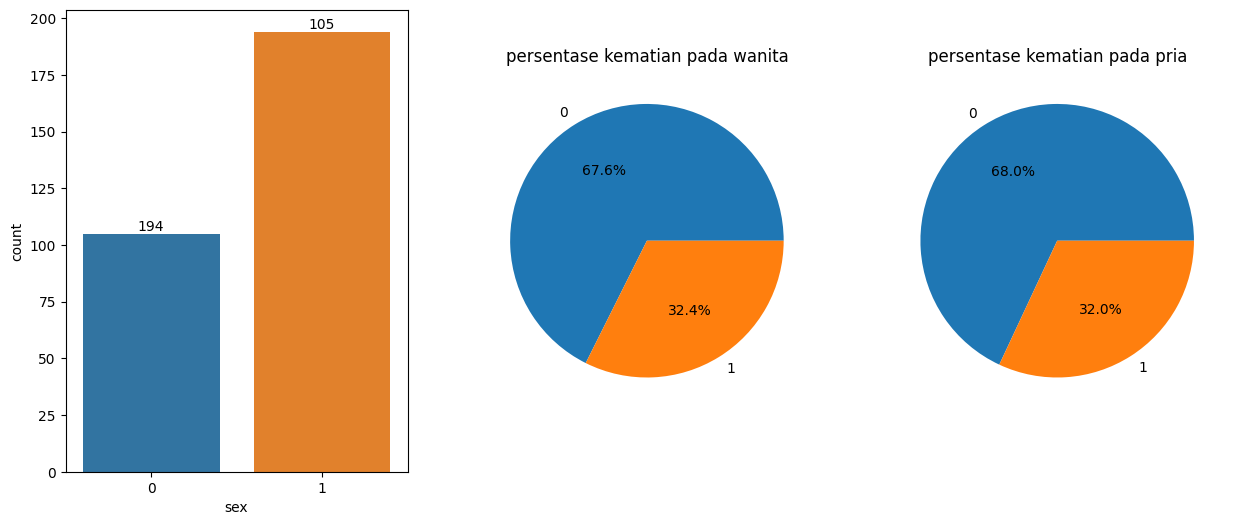

In [58]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
ax = sns.countplot(x='sex', data=data)
abs_values = data.sex.value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)

plt.subplot(1,3,2)
plt.pie(data[data.sex == 0].DEATH_EVENT.value_counts(), labels=data.DEATH_EVENT.value_counts().index ,autopct='%1.1f%%')
plt.title('persentase kematian pada wanita')

plt.subplot(1,3,3)
plt.pie(data[data.sex == 1].DEATH_EVENT.value_counts(), labels=data.DEATH_EVENT.value_counts().index ,autopct='%1.1f%%')
plt.title('persentase kematian pada pria')
plt.show()


label 0 adalah wanita dan label 1 adalah pria, jika dilihat dari pie chart keamtian akibat gagal jantung ini tidak ada hubungannya dengan kematian.

### smoking

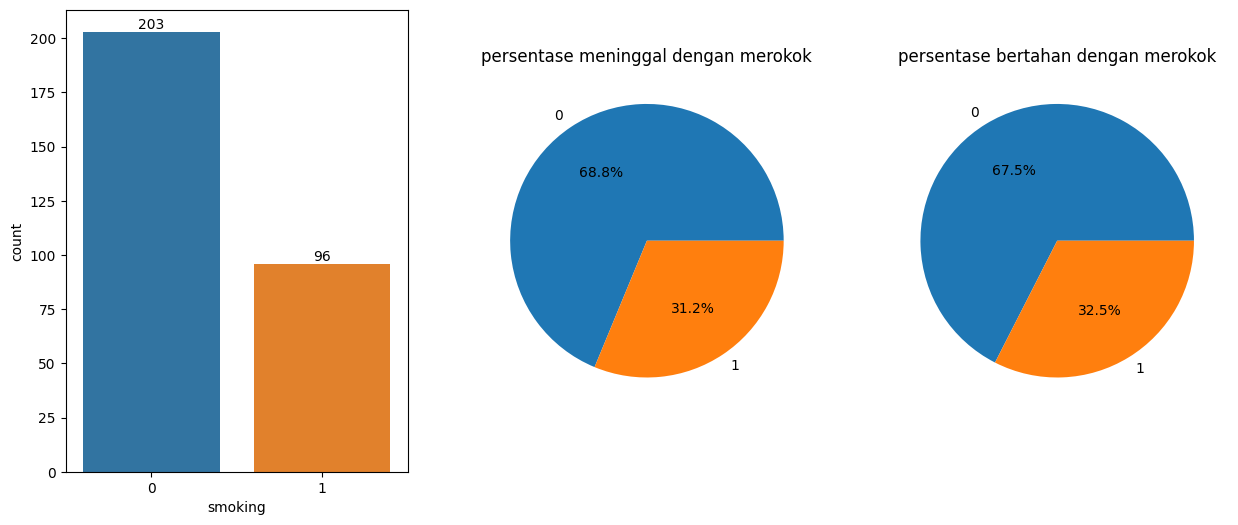

In [59]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
ax = sns.countplot(x='smoking', data=data)
abs_values = data.smoking.value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)

plt.subplot(1,3,2)
plt.pie(data[data.smoking == 1].DEATH_EVENT.value_counts(), labels=data.DEATH_EVENT.value_counts().index ,autopct='%1.1f%%')
plt.title('persentase meninggal dengan merokok')

plt.subplot(1,3,3)
plt.pie(data[data.smoking == 0].DEATH_EVENT.value_counts(), labels=data.DEATH_EVENT.value_counts().index ,autopct='%1.1f%%')
plt.title('persentase bertahan dengan merokok')
plt.show()

### Time

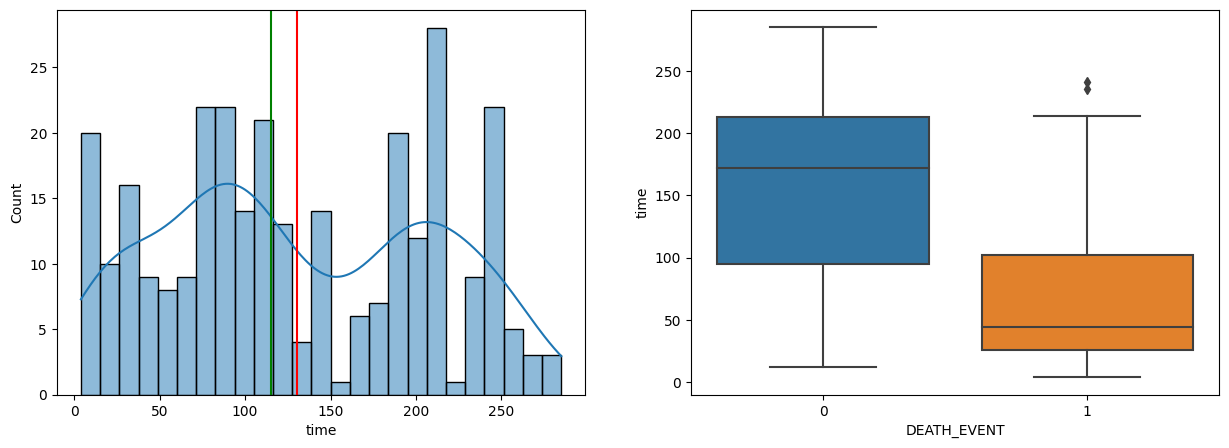

Skewness : 0.12780264559841178
Mean : 130.2608695652174
median : 115.0


In [60]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(data.time, bins=25, kde = True)
plt.axvline(data.time.mean(), color = 'r')
plt.axvline(data.time.median(), color = 'g')

plt.subplot(1,2,2)
sns.boxplot(x = 'DEATH_EVENT', y='time', data = data)
plt.show()
print(f'Skewness : {data.time.skew()}')
print(f'Mean : {data.time.mean()}')
print(f'median : {data.time.median()}')


dari histogram terlihat distribusi kolom time ini berbentuk normal karena nilai skewness ada diantara 0.5 dan -0.5, memiliki rata rata 130 dan nilai tengah 115, pada boxplot juga terlihat kolom time memiliki korelasi dengan kolom target, kare jumlah waktu perawatan dari pasien yang selamat lebih lama.

<AxesSubplot: >

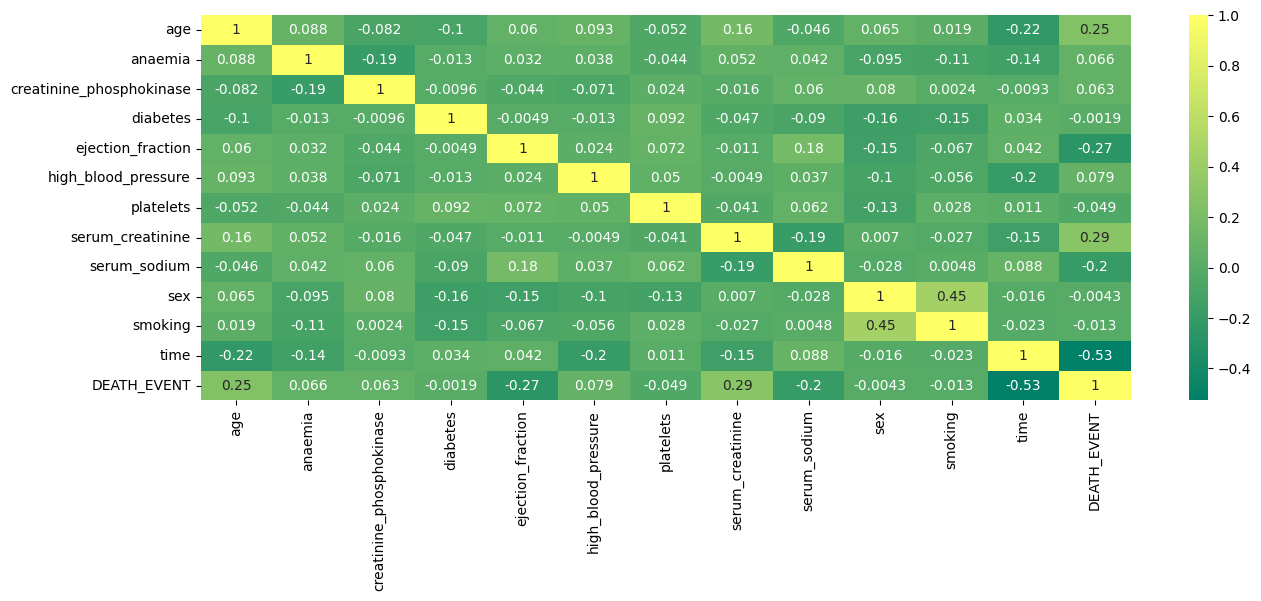

In [61]:
plt.figure(figsize=(15,5))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='summer')

pada tabel koreali diatas kolom DETH_EVENT (target), berkorelasi dengan kolom age, ejection_fraction, serum_creatinine, serum_sodium, dan time, karena kolom age berkorelasi dengan kolom  time dan kolom time memiliki ilai korelasi lebih tinggi maka kolom age tidak akan digunakan dan hanya menggunakan kolom time, dan kolom serum_sodium memiliki korelasi dengan kolom ejection_fraction dan serum_creatinine sehingga kolom serum_sodium tiadk akan digunakan dalam feature, sehingga kolom yang akan digunakan adalah `DEATH_EVENT` sebagai target, `time`, `ejection_fraction` dan `serum_creatinine` sebagai features.

## Data Preprocessing

### Split Data

In [62]:
X = data.drop(['DEATH_EVENT'], axis=1) # Features
y = data['DEATH_EVENT'] # Target
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,42.0,1,250,1,15,0,213000.00,1.3,136,0,0,65
1,46.0,0,168,1,17,1,271000.00,2.1,124,0,0,100
2,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
3,53.0,1,91,0,20,1,418000.00,1.4,139,0,0,43
4,50.0,1,582,1,20,1,279000.00,1.0,134,0,0,186
...,...,...,...,...,...,...,...,...,...,...,...,...
294,63.0,1,122,1,60,0,267000.00,1.2,145,1,0,147
295,45.0,0,308,1,60,1,377000.00,1.0,136,1,0,186
296,70.0,0,97,0,60,1,220000.00,0.9,138,1,0,186
297,53.0,1,446,0,60,1,263358.03,1.0,139,1,0,215


In [63]:
# Membagi data dengan perbandingan 8:2 8 untuk data train dan 2 untuk data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27, stratify=data.DEATH_EVENT)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)
X_train

Train Size :  (239, 12)
Test Size  :  (60, 12)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
279,75.0,0,119,0,50,1,248000.0,1.1,148,1,0,209
241,69.0,0,1419,0,40,0,105000.0,1.0,135,1,1,147
31,65.0,1,335,0,35,1,235000.0,0.8,136,0,0,120
66,40.0,1,101,0,40,0,226000.0,0.8,141,0,0,187
67,60.0,1,2281,1,40,0,283000.0,1.0,141,0,0,187
...,...,...,...,...,...,...,...,...,...,...,...,...
131,63.0,1,514,1,25,1,254000.0,1.3,134,1,0,83
92,60.0,1,96,1,60,1,271000.0,0.7,136,0,0,94
114,72.0,0,364,1,20,1,254000.0,1.3,136,1,1,59
215,63.0,0,936,0,38,0,304000.0,1.1,133,1,1,88


### Missing Value Check

In [64]:
# Check Missing Values in `X_train`

X_train.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
dtype: int64

In [65]:
# Check Missing Values in `X_test`

X_test.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
dtype: int64

### Feature Selection

In [66]:
# Feature yang digunakan hanya 3 yaitu ejection_fraction, serum_creatinine dan time
X_train = X_train[['ejection_fraction', 'serum_creatinine', 'time']]
X_test = X_test[['ejection_fraction', 'serum_creatinine', 'time']]


### Scaling

In [67]:
# Scaling data menggunakan standard scaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[ 0.99322808, -0.28199009,  1.06686808],
       [ 0.15501653, -0.37264873,  0.2565733 ],
       [-0.26408925, -0.553966  , -0.09629701],
       [ 0.15501653, -0.553966  ,  0.77934413],
       [ 0.15501653, -0.37264873,  0.77934413],
       [ 0.15501653, -0.19133145,  1.13221444],
       [-0.68319502, -0.19133145, -1.28560065],
       [ 1.83143964, -0.37264873,  1.43280767],
       [-1.1023008 , -0.19133145,  0.34805819],
       [ 0.15501653,  0.26196174, -0.6844142 ],
       [-0.68319502,  0.80591356, -1.27253138],
       [-0.26408925, -0.37264873, -1.29866992],
       [-0.68319502, -0.64462464, -0.20085118],
       [-0.26408925, -0.46330736, -1.40322409],
       [ 0.57412231, -0.20946318, -0.52758295],
       [-0.01262578,  0.37981797, -1.31173919],
       [-0.26408925, -0.46330736,  0.24350403],
       [ 0.15501653, -0.553966  ,  1.60270819],
       [-0.68319502, -0.19133145, -1.24639284],
       [ 1.83143964, -0.553966  , -0.30540534],
       [ 0.99322808,  0.80591356, -0.527

## Model Definition

In [68]:
# Base model
rf = RandomForestClassifier()
xgb = XGBClassifier()

# Model dengan hyperparameter
rf_params = RandomForestClassifier(n_estimators=500, max_depth=1, min_samples_leaf=2, random_state=27)
xgb_params = XGBClassifier(n_estimators=300, learning_rate=0.01, max_depth=2, verbosity=0, silent=True, random_state=27)

Kelebihan Random Forest :
- Mampu menangani data yang bersifat non-linier dan multi-koinpresi
- Mampu menangani missing value dalam data
- Mampu menangani jumlah fitur yang sangat banyak
- Memiliki tingkat akurasi yang tinggi dibandingkan dengan algoritma pembelajaran mesin lainnya
- Dapat digunakan untuk tipe data numerik maupun kategorical
- Dapat memberikan feature importance, yang memudahkan dalam pemilihan fitur yang penting.

Kelebihan eXtream Gradient Boosting :
- Memiliki tingkat akurasi yang tinggi dibandingkan dengan algoritma pembelajaran mesin lainnya
- Memiliki kemampuan regularisasi yang baik, sehingga dapat menangani overfitting
- Dapat digunakan untuk tipe data numerik maupun kategorical
- Memiliki fitur yang sangat banyak yang dapat digunakan untuk mengoptimalkan model
- Dapat dioptimalkan dengan menggunakan parameter tuning
- Dapat digunakan untuk masalah pembelajaran supervised dan unsupervised
- Dapat digunakan untuk masalah klasifikasi dan regresi.
  
alasan saya menggunakan XGboost adalah karena kelebihannya yang memiliki akurasi yang tinggi dibandingkan dengan model lain.

## Model Training

Pada bagian ini dilakukan model training dengan data yang sudah di scale, model yang digunakan adalah Random Forest dan eXtream Gradient Boosting dan kedua model ini ditambah hyperparameter

In [69]:
# Model Training untuk base model
rf.fit(X_train_scaled,y_train)
xgb.fit(X_train_scaled,y_train)

# Model training untuk model dengan hyperparameter
rf_params.fit(X_train_scaled,y_train)
xgb_params.fit(X_train_scaled,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=27, ...)

## Model Evaluation

### Baseline Model

In [70]:
print('Training Score:', rf.score(X_train_scaled, y_train))
print('Test Score:', rf.score(X_test_scaled, y_test))
print('------------------------------------------------------')
print(classification_report(y_test, rf.predict(X_test_scaled)))

Training Score: 1.0
Test Score: 0.8833333333333333
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.98      0.92        41
           1       0.93      0.68      0.79        19

    accuracy                           0.88        60
   macro avg       0.90      0.83      0.85        60
weighted avg       0.89      0.88      0.88        60



In [71]:
print('Training Score:', xgb.score(X_train_scaled, y_train))
print('Test Score:', xgb.score(X_test_scaled, y_test))
print('------------------------------------------------------')
print(classification_report(y_test, xgb.predict(X_test_scaled)))

Training Score: 1.0
Test Score: 0.8666666666666667
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        41
           1       0.79      0.79      0.79        19

    accuracy                           0.87        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.87      0.87      0.87        60



Karena dari kedua model ini memiliki akurasi, training scrore dan test score yang sama dan keduanya overfit maka akan dilakukan hyperparameter tunning untuk kedua model ini

### Hyper Parameter tunning

In [72]:
print('Training Score:', rf_params.score(X_train_scaled, y_train))
print('Test Score:', rf_params.score(X_test_scaled, y_test))
print('------------------------------------------------------')
print(classification_report(y_test, rf_params.predict(X_test_scaled)))

Training Score: 0.8242677824267782
Test Score: 0.7833333333333333
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.76      1.00      0.86        41
           1       1.00      0.32      0.48        19

    accuracy                           0.78        60
   macro avg       0.88      0.66      0.67        60
weighted avg       0.84      0.78      0.74        60



In [73]:
print('Training Score:', xgb_params.score(X_train_scaled, y_train))
print('Test Score:', xgb_params.score(X_test_scaled, y_test))
print('------------------------------------------------------')
print(classification_report(y_test, xgb_params.predict(X_test_scaled)))

Training Score: 0.8870292887029289
Test Score: 0.8666666666666667
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.95      0.91        41
           1       0.87      0.68      0.76        19

    accuracy                           0.87        60
   macro avg       0.87      0.82      0.84        60
weighted avg       0.87      0.87      0.86        60



pada Random Forest ketika dilakukan tunning training score dan test score menjadi underfit, seadngkan pada eXtreme Gradient Boosting menjadi goodfit

In [74]:
rf_confusion_matrix = confusion_matrix(y_test, rf.predict(X_test_scaled))
rf_params_confusion_matrix = confusion_matrix(y_test, rf_params.predict(X_test_scaled))
xgb_confusion_matrix = confusion_matrix(y_test, xgb.predict(X_test_scaled))
xgb_params_confusion_matrix = confusion_matrix(y_test, xgb_params.predict(X_test_scaled))


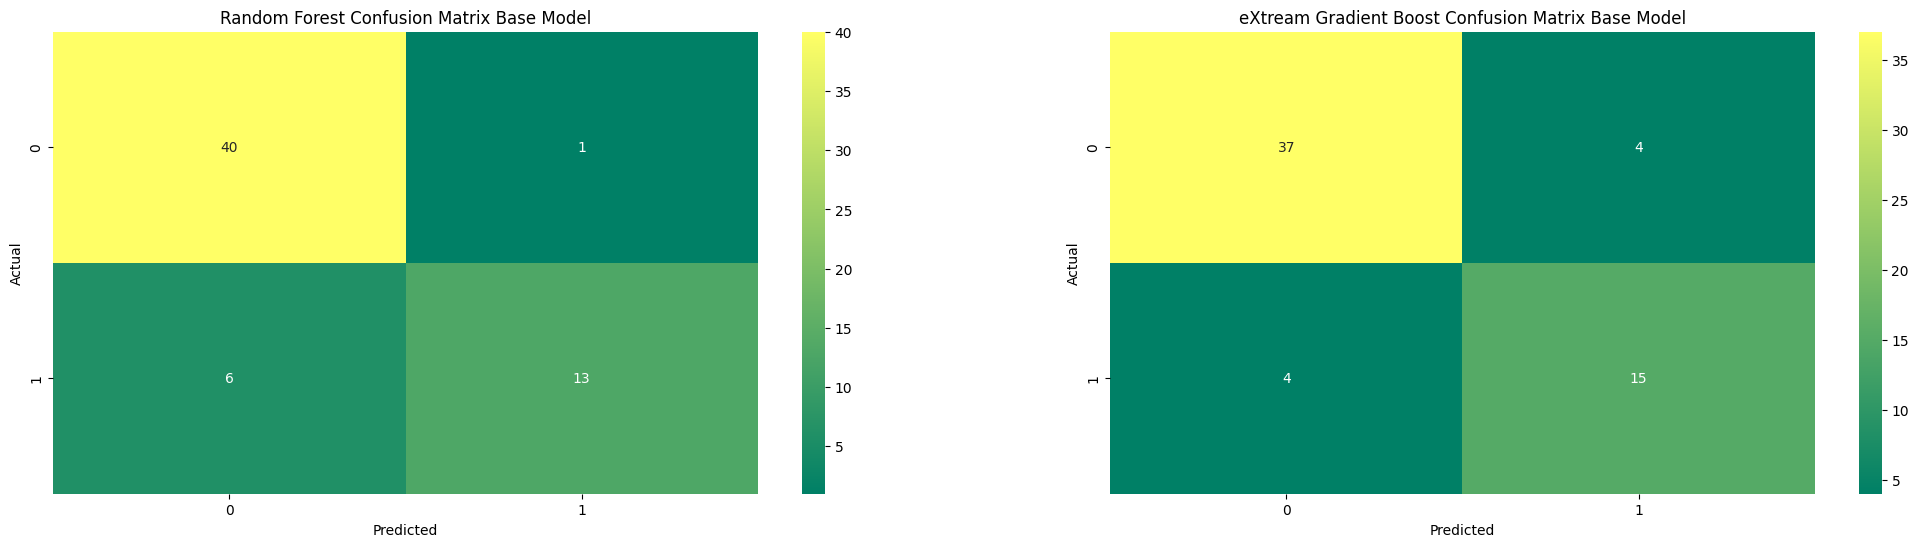

In [75]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
sns.heatmap(rf_confusion_matrix, annot=True, cmap='summer')
plt.title('Random Forest Confusion Matrix Base Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.subplot(1, 2, 2)
sns.heatmap(xgb_confusion_matrix, annot=True, cmap='summer')
plt.title('eXtream Gradient Boost Confusion Matrix Base Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

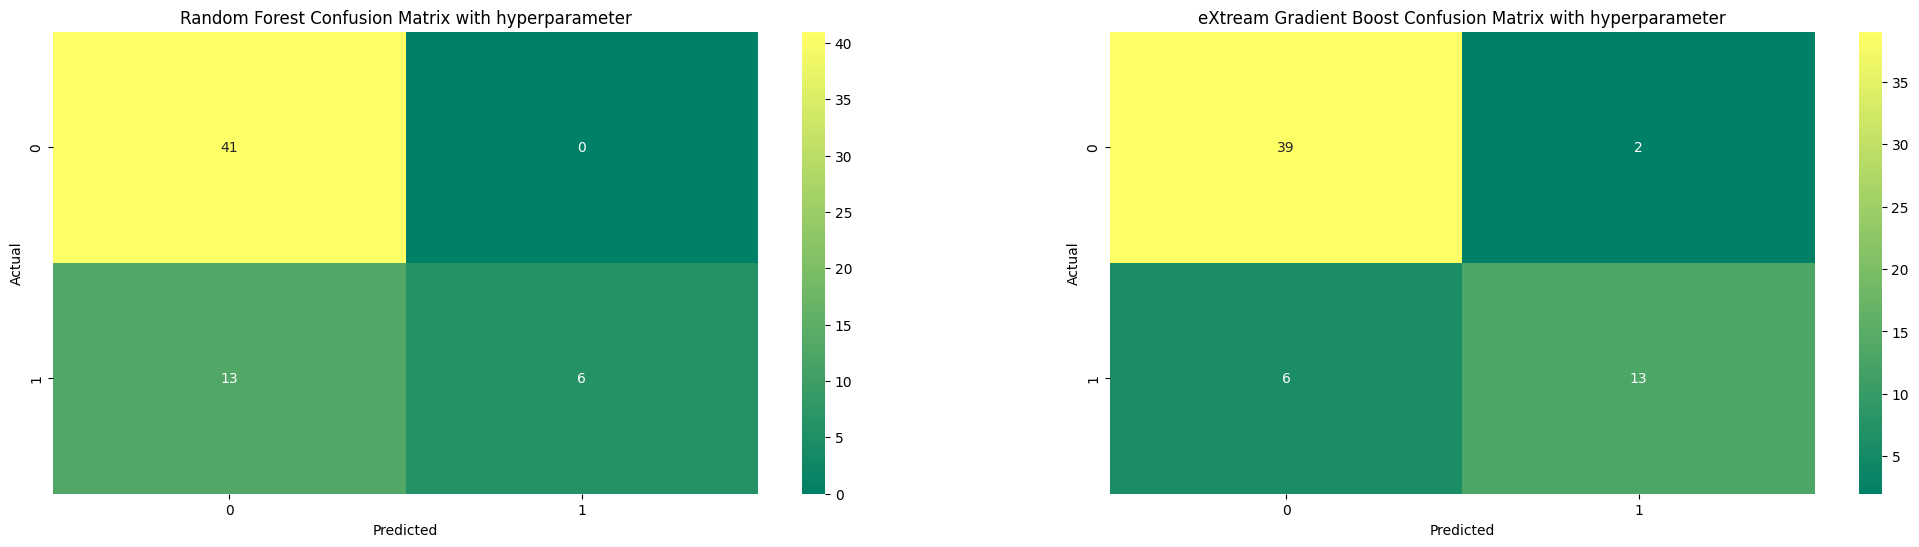

In [76]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
sns.heatmap(rf_params_confusion_matrix, annot=True, cmap='summer')
plt.title('Random Forest Confusion Matrix with hyperparameter')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.subplot(1, 2, 2)
sns.heatmap(xgb_params_confusion_matrix, annot=True, cmap='summer')
plt.title('eXtream Gradient Boost Confusion Matrix with hyperparameter')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Model Analysis

Karena yang dilihat adalah false positif dimana label 1 adalah orang yang mati (+), sehingga yang difokuskan adalah pada nilai precision, pada baseline model nilai precision label 0 tertinggi adalah pada model xgb sebesar 0.90 namun memiliki score yang overfit sedangkan pada model yang menggunakan hyperparameter model xgb ini memiliki nilai precision untuk label 0 sebesar 0.87 namun karena train score dan test score pada xgb yang menggunakan hyperparameter adalah goodfit maka model xgb dengan hyperparameter ini adalah model terbaik dan nantinya akan digunakan untuk data inference.

## Model Saving

In [77]:
# convert dataframe to list agar bisa export ke json
X_inf = X_train.select_dtypes(include=np.number).columns.tolist()

In [78]:
with open('model_xgb.pkl', 'wb') as file_model:
  pickle.dump(xgb_params, file_model)

with open('model_scaler.pkl', 'wb') as file_scaler:
  pickle.dump(scaler, file_scaler)

with open('data.txt', 'w') as file_data:
  json.dump(X_inf, file_data)


## Model Inference

model inference menggunakan notebook yg terpisah dengan nama file `inference.ipynb`

deployment : [Death-Event-Prediction](https://huggingface.co/spaces/salmanfaishal27/Death-Event-Prediction)

## Pengambilan Kesimpulan

Dataset ini berisi riwayat kesehatan pasien yang memiliki penyakit gagal jantung, pada dataset ini ditemukan pasien yang meninggal sebanyak 32.1% pasien meninggal akibat gagal jantung, rata rata pasien meninggal berusia 65 tahun dengan waktu pengobatan yang lebih sedikit dibandingkan dengan orang yang bertahan hidup, dan pasien meninggal memiliki ejection fraction dengan rata rata 30% dimana untuk orang normal adalah 55-70%.

pada project ini difokuskan pada nilai precison untuk label 0 karena saya mengasumsikan bahwa karena yang diprediksi adalah orang yang meninggal maka label 1 (positif), sehingga dapat disimpulkan bahwa yang harus dilakukan peningkatan adalah pada nilai precision atau mengurangi false positif, alasannya karena ketika seseorang aktualnya meninggal dan diprediksi tidak meninggal maka yang ditakutkan adalah penanganan yang dilakukan pada pasien ini tidak tepat.

Dari hasil corelation matrix feature yang digunakan adalah ejection_fraction, serum_creatinine dan time, feature tersebut dilatih menggunakan 2 model yaitu Random Forest dan eXtream Gradient Boosting dimana kedua model tersebut memiliki data overfit dengan score yang sama sehingga model model tersebut dilakukan tunning dan menghasilkan score yang goodfit pada kedua model tersebut, untuk eXtream Gradient Boost mendapatkan score precision sebesar 0.87 pada label 0 dan untuk Random Forest mendapatkan score precision 0.76 pada label 0, dapat dilihat juga pada confusion matrix dimana jumlah data yang terprediksi sehat dan aktualnya meninggal (false positif) lebih sedikit pada model eXtream Gradient Boost dengan jumlah 6 sedangakan pada Random Forest jumlahnya 13.

Sehingga, model yang memiliki performa terbaik untuk dataset ini adala model eXtream Gradient Boost dengan menggunakan hyperparameter n_estimators=300, learning_rate=0.01, max_depth=2

### Model improvement

Improvement yang dapat diterapkan pada model ini adalah dengan menggunakan hyperparameter yang difokuskan untuk meningkatkan performance pada precision untuk meminimalkan false positif 

### Answer

1. Jelaskan latar belakang adanya bagging dan cara kerja bagging !

Bagging adalah singkatan dari Bootstrap Aggregating, yang merupakan teknik pembelajaran mesin yang digunakan untuk meningkatkan kinerja model dengan menggunakan beberapa model yang di-train dengan data yang diambil secara acak dari dataset yang sama. Bagging digunakan untuk mengurangi variasi dari model yang dihasilkan oleh algoritma pembelajaran mesin, dengan cara mengambil beberapa sampel acak dari dataset dan menggunakan sampel tersebut untuk melatih beberapa model yang berbeda. Kemudian, hasil dari masing-masing model digabungkan untuk membuat prediksi akhir.

Cara kerja bagging adalah sebagai berikut:

1. Pertama-tama, dataset yang digunakan di-resample menjadi beberapa sampel yang lebih kecil dengan menggunakan teknik bootstraping.
2. Kemudian, setiap sampel digunakan untuk melatih model yang berbeda.
3. Setelah itu, hasil dari masing-masing model digabungkan untuk membuat prediksi akhir.
Bagging sering digunakan dalam klasifikasi dan regresi. Bagging digunakan untuk mengurangi variasi dari model yang dihasilkan oleh algoritma pembelajaran mesin, dengan cara mengambil beberapa sampel acak dari dataset dan menggunakan sampel tersebut untuk melatih beberapa model yang berbeda. Hal ini akan mengurangi overfitting dan memperbaiki generalisasi dari model.

2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !

Random Forest menggunakan teknik yang disebut "bootstrap aggregating" atau "bagging" untuk membuat beberapa model dari sub-sampel data dan fitur yang diambil secara acak. Kemudian, hasil dari setiap model individu diagregasikan untuk menghasilkan prediksi akhir.

Sedangkan XGBoost (eXtreme Gradient Boosting) menggunakan teknik "boosting" untuk membuat model individu dan menggabungkannya. Boosting adalah metode yang menggunakan model individu yang lemah, tetapi banyak, dan menggabungkannya dengan cara mengurangi kesalahan dari model sebelumnya. XGBoost menggunakan algoritma gradient boosting untuk membuat model individu yang dioptimalkan dengan mengurangi fungsi kesalahan yang digunakan.

Secara umum, Random Forest lebih mudah digunakan dan lebih stabil dibandingkan dengan XGBoost, sementara XGBoost biasanya memberikan hasil yang lebih baik dalam kasus yang lebih kompleks.